In [1]:
import numpy as np
import time
import pandas as pd
from scipy.sparse import csr_matrix
from netreco import Reconstructor, ss_sim
from netreco.Reconstructor import Profile
import matplotlib.pyplot as plt

R = 200

/home/nwoodbury/.virtualenvs/netreco/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


Preparing for an Unmeasured Reconstruction ...
	Done. Took 0.000 Seconds
Building LQ ...
	Done. Took 0.380 Seconds
Building M ...
	Done. Took 0.396 Seconds
Building yhat ...
	Done. Took 0.000 Seconds
Running Least Squares to get xhat ...
	Finished lsq: Error = 0.032
	Done. Took 0.125 Seconds
Extracting Qis ...
	Done. Took 0.001 Seconds
Learning Convolution for Q(1,2) ...
	Q(1,2) XOM <-- GE: -9.459*(-0.035)^t + -4.882*(0.032)^t + -1.007*(-0.020)^t + -3.792*(0.033)^t + 19.140100 * delta(t,0)
		RMSE = 0.044
		Matlab: [-9.46 -0.04 -4.88  0.03 -1.01 -0.02 -3.79  0.03]
	Done. Took 5.720 Seconds
Learning Convolution for Q(1,3) ...
	Q(1,3) XOM <-- CVX: -1.304*(0.118)^t + -0.339*(0.174)^t + 0.496*(0.262)^t + 0.838*(0.096)^t + 0.308882 * delta(t,0)
		RMSE = 0.035
		Matlab: [-1.3   0.12 -0.34  0.17  0.5   0.26  0.84  0.1 ]
	Done. Took 6.433 Seconds
Learning Convolution for Q(2,1) ...
	Q(2,1) GE <-- XOM: -2.542*(-0.197)^t + -0.797*(-0.608)^t + -2.686*(0.025)^t + 1.859*(-0.472)^t + 4.167044 * delta

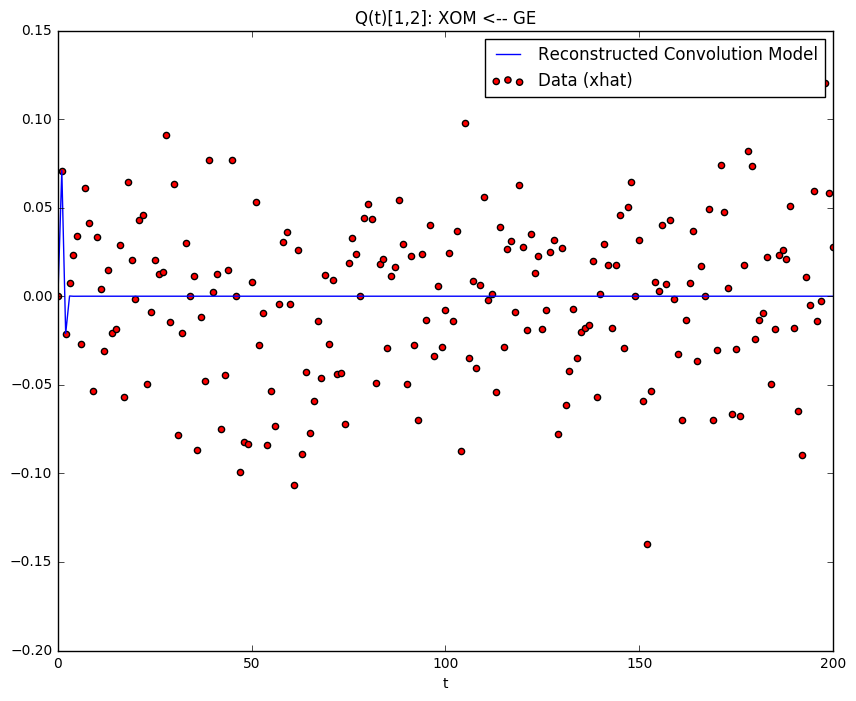

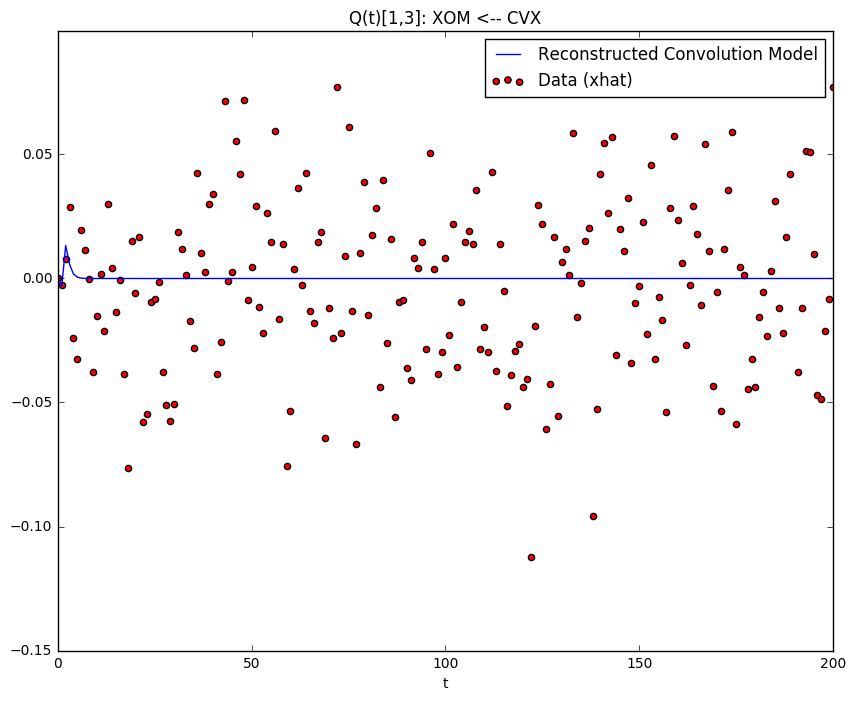

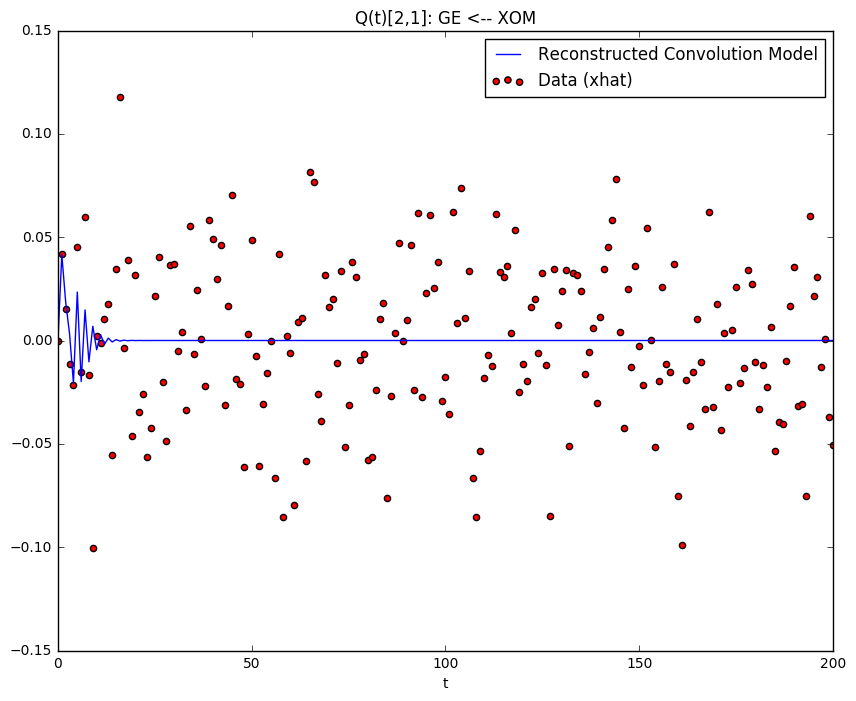

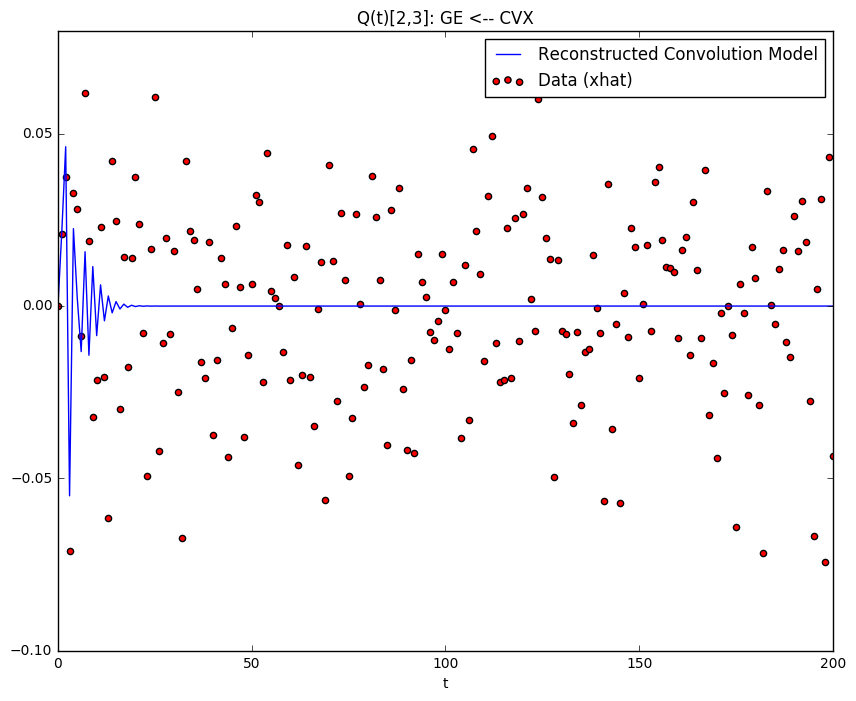

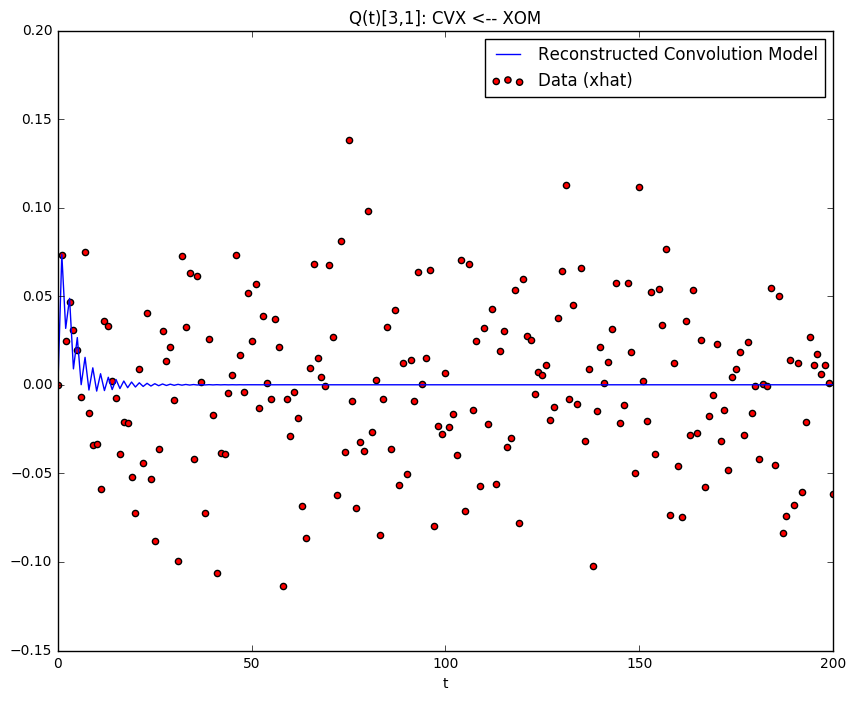

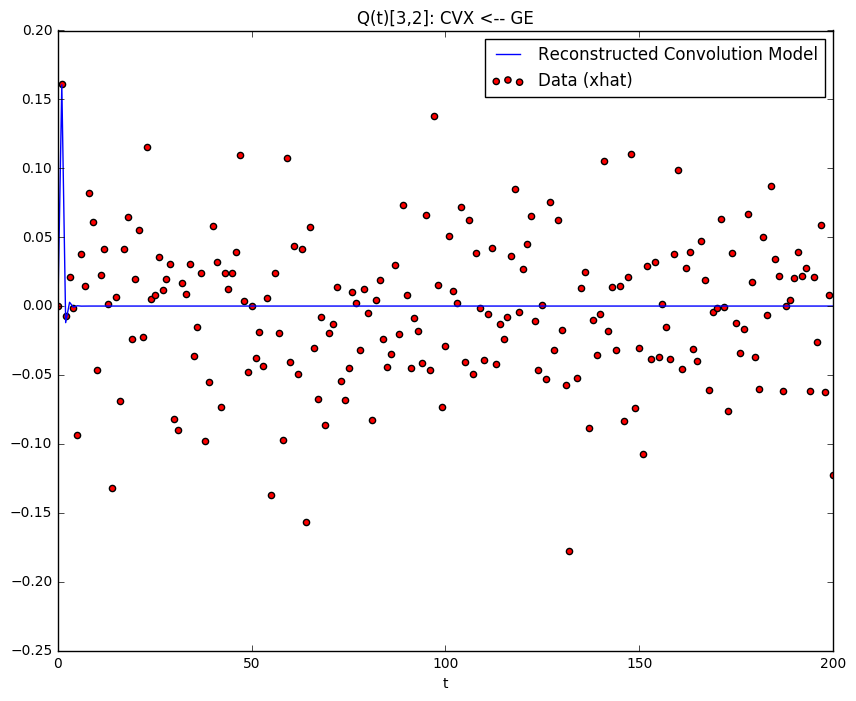

In [2]:
%matplotlib inline
y = pd.read_csv('returns.csv', index_col=0)
y = y.head(R * 6 + 1)
tot = y.applymap(lambda x: abs(x)).mean()
tot.sort(ascending=False)
# securities = np.random.choice(list(y.columns), n)# ['AMG', 'WLTW', 'JBHT', 'BDX', 'DISCA', 'AME', 'FSLR', 'URBN', 'MRO', 'NWSA']
cols = ['XOM', 'GE', 'CVX']

fulldf = y
y = y[cols].values

titles = {i + 1: sec for i, sec in enumerate(cols)}

recon = Reconstructor(debug=True, r=R, max_iterations=1000, bounds=10, order=4, robust=False)
rs = recon.unmeasured(y, plot=True, titles=titles)

flat = []
for key, vals in rs.items():
    for k2, lst in vals.items():
        flat.append(list(lst))

In [3]:
subs = [' '.join([str(item) for item in sub]) for sub in flat]
arr = ' ; '.join(subs)
colstrs = ['\'{}\''.format(item) for item in cols]
print('vulnerabilities([{}], {{{}}});'.format(arr, ', '.join(colstrs)))

vulnerabilities([-9.45911452143 -0.0350424217873 -4.88202939034 0.0321342453289 -1.00687060231 -0.0195940895096 -3.79208588567 0.0325397511196 ; -1.30404473946 0.118381927226 -0.338525687273 0.173631496919 0.495748673062 0.262278374479 0.837939667589 0.0956806398172 ; -2.54233881655 -0.197334467028 -0.797390370128 -0.607889107836 -2.68622801375 0.0251818196809 1.85891304459 -0.471915536779 ; 4.0143684271 -0.545738321497 -4.37897617018 -0.31289847489 6.10073350281 -0.0547076262092 -1.87159521541 -0.628322156702 ; 0.10982649325 0.671951569865 -1.53084858497 -0.848904483954 4.17726071757 -0.00498219618327 1.50711207339 -0.848613850116 ; -1.54867280145 -0.189073942462 6.82982639542 -0.135526102564 -6.81053836435 -0.0846487751969 -1.41205911334 -0.153621175485], {'XOM', 'GE', 'CVX'});


In [4]:
y = fulldf
print(len(y))
print(y['A'].head(10))
print(y['A'].tail(10))

1201
2016-10-28T08:56:00-06:00    0.000000
2016-10-28T08:57:00-06:00    0.000000
2016-10-28T08:58:00-06:00    0.000000
2016-10-28T08:59:00-06:00    0.000000
2016-10-28T09:00:00-06:00    0.000000
2016-10-28T09:01:00-06:00    0.001143
2016-10-28T09:02:00-06:00    0.000000
2016-10-28T09:03:00-06:00    0.000000
2016-10-28T09:04:00-06:00   -0.000457
2016-10-28T09:05:00-06:00    0.000229
Name: A, dtype: float64
2016-11-02T08:03:00-06:00   -0.001376
2016-11-02T08:05:00-06:00   -0.000916
2016-11-02T08:07:00-06:00    0.000000
2016-11-02T08:09:00-06:00    0.000000
2016-11-02T08:10:00-06:00    0.000688
2016-11-02T08:11:00-06:00    0.000000
2016-11-02T08:12:00-06:00    0.000000
2016-11-02T08:14:00-06:00    0.000000
2016-11-02T08:15:00-06:00   -0.000229
2016-11-02T08:17:00-06:00   -0.001373
Name: A, dtype: float64


/home/nwoodbury/.virtualenvs/netreco/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


Preparing for an Unmeasured Reconstruction ...
	Done. Took 0.000 Seconds
Building LQ ...
	Done. Took 0.380 Seconds
Building M ...
	Done. Took 0.395 Seconds
Building yhat ...
	Done. Took 0.000 Seconds
Running Least Squares to get xhat ...
	Finished in 500 iterations
	Done. Took 0.807 Seconds
Extracting Qis ...
	Done. Took 0.002 Seconds
Learning Convolution for Q(1,2) ...
	Q(1,2) XOM <-- GE: -1.623*(-0.011)^t + -1.120*(-0.007)^t + 2.473*(0.002)^t + 0.429*(-0.007)^t + -0.159408 * delta(t,0)
		RMSE = 0.011
		Matlab: [-1.62 -0.01 -1.12 -0.01  2.47  0.    0.43 -0.01]
	Done. Took 10.787 Seconds
Learning Convolution for Q(1,3) ...
	Q(1,3) XOM <-- CVX: -0.398*(0.040)^t + 0.207*(0.058)^t + -0.450*(0.005)^t + -0.584*(-0.010)^t + 1.224322 * delta(t,0)
		RMSE = 0.007
		Matlab: [-0.4   0.04  0.21  0.06 -0.45  0.   -0.58 -0.01]
	Done. Took 16.637 Seconds
Learning Convolution for Q(2,1) ...
	Q(2,1) GE <-- XOM: -0.645*(-0.130)^t + 0.708*(-0.146)^t + -0.110*(-0.196)^t + -0.135*(-0.008)^t + 0.181544 * de

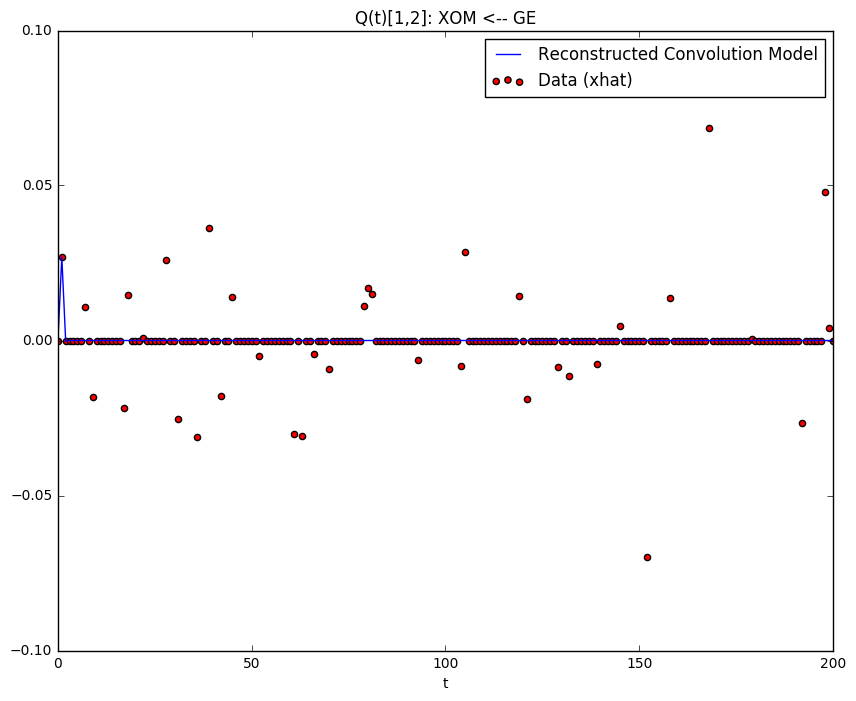

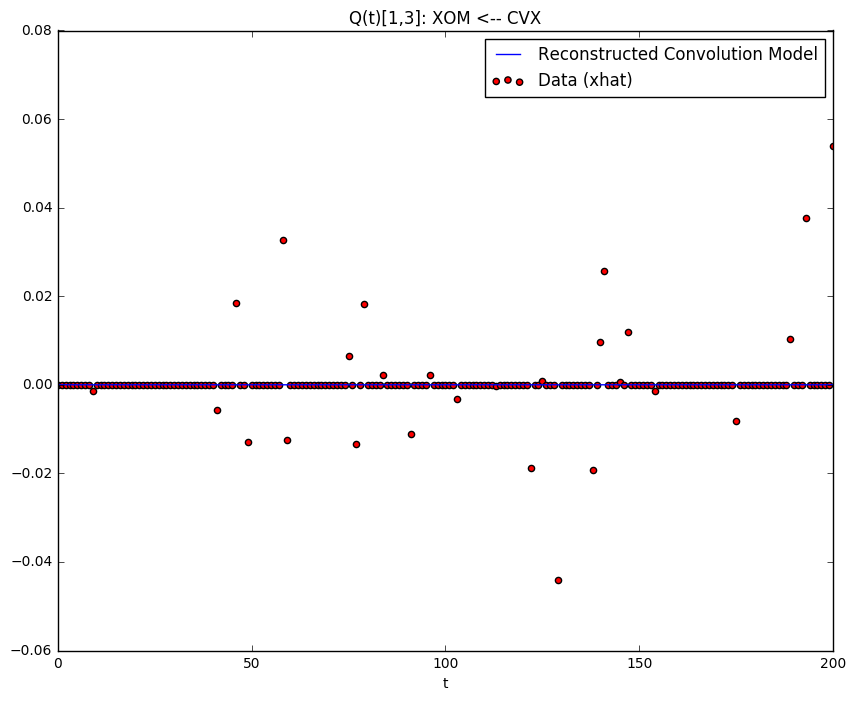

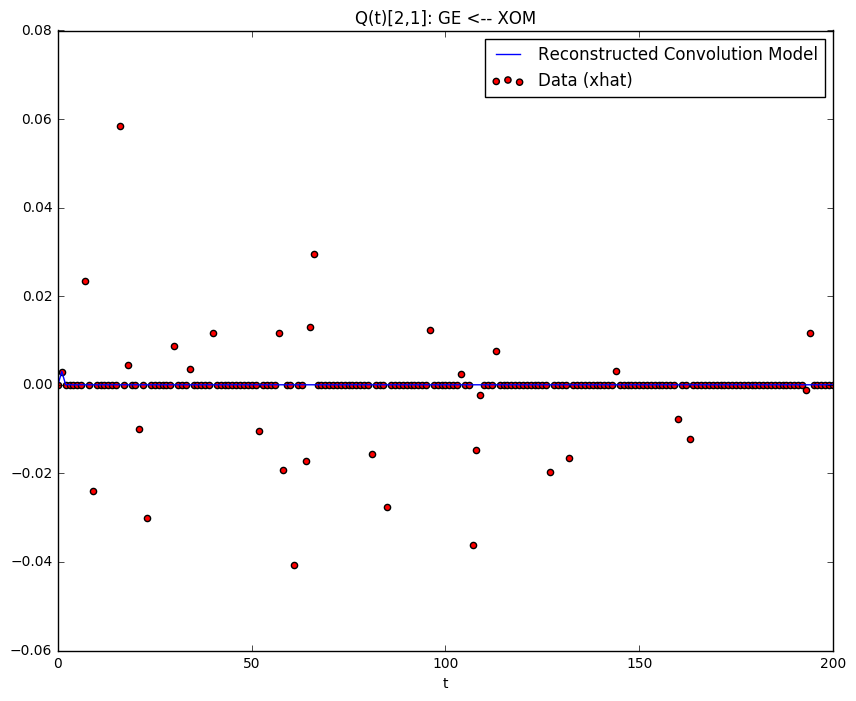

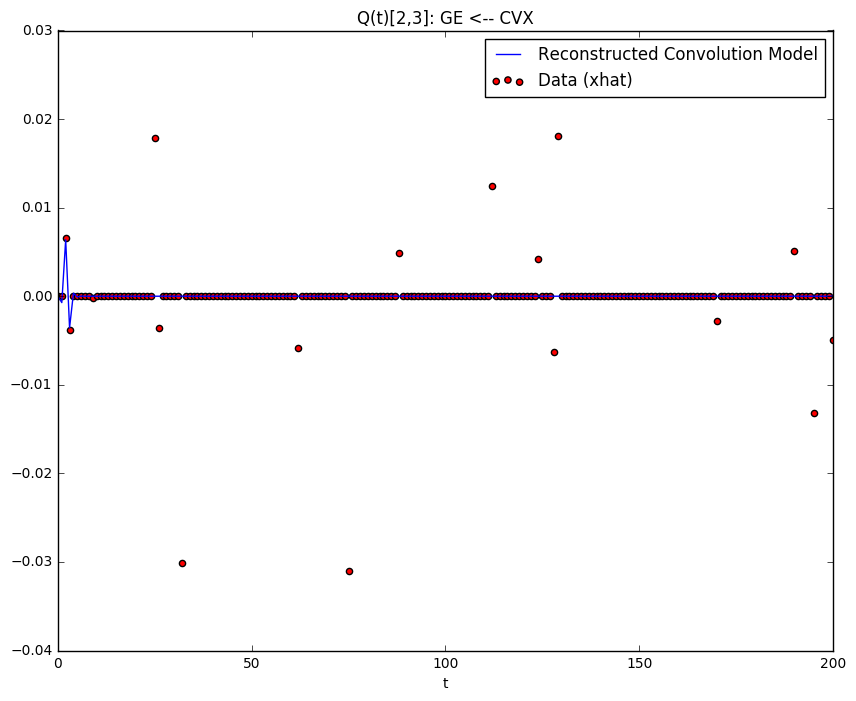

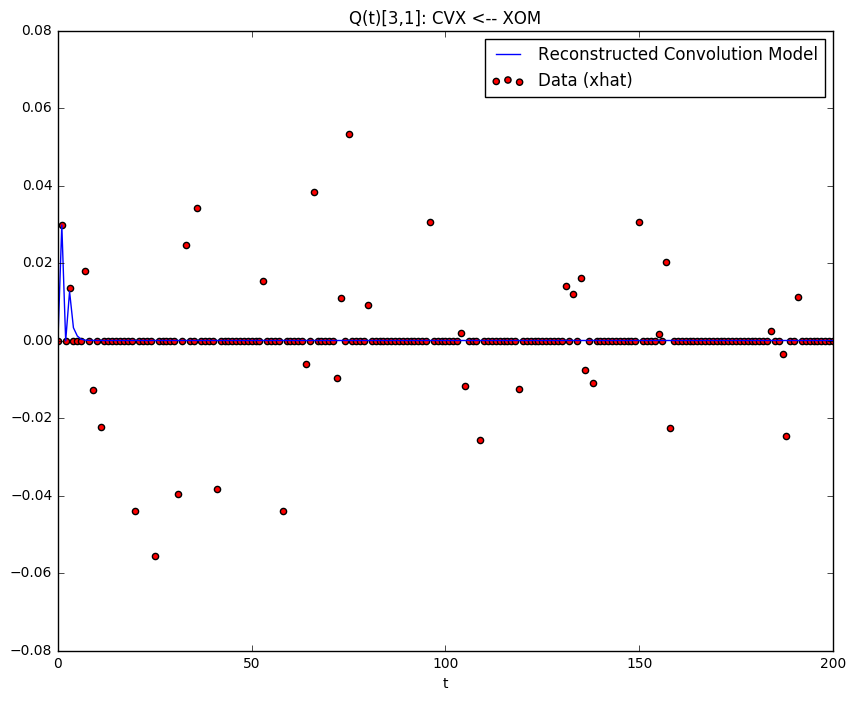

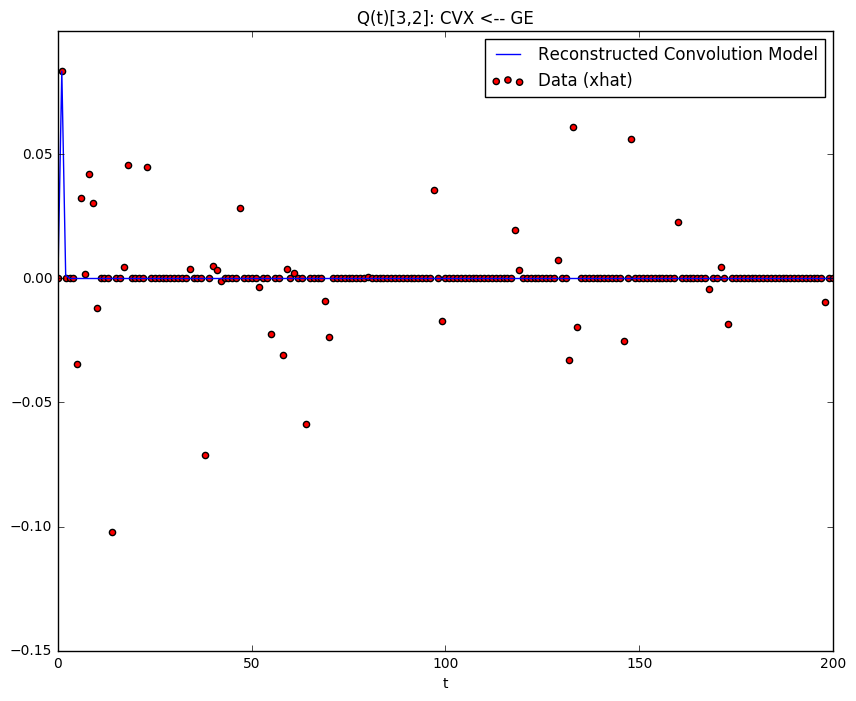

In [5]:
%matplotlib inline
y = pd.read_csv('returns.csv', index_col=0)
y = y.head(R * 6 + 1)
tot = y.applymap(lambda x: abs(x)).mean()
tot.sort(ascending=False)
# securities = np.random.choice(list(y.columns), n)# ['AMG', 'WLTW', 'JBHT', 'BDX', 'DISCA', 'AME', 'FSLR', 'URBN', 'MRO', 'NWSA']
cols = ['XOM', 'GE', 'CVX']

fulldf = y
y = y[cols].values

titles = {i + 1: sec for i, sec in enumerate(cols)}

recon = Reconstructor(debug=True, r=R, max_iterations=1000, bounds=10, order=4, robust=True)
rs = recon.unmeasured(y, plot=True, titles=titles)

flat = []
for key, vals in rs.items():
    for k2, lst in vals.items():
        flat.append(list(lst))

In [6]:
subs = [' '.join([str(item) for item in sub]) for sub in flat]
arr = ' ; '.join(subs)
colstrs = ['\'{}\''.format(item) for item in cols]
print('vulnerabilities([{}], {{{}}});'.format(arr, ', '.join(colstrs)))

vulnerabilities([-1.6228244844 -0.0106700088135 -1.11957349563 -0.00662277032664 2.47257514877 0.00203768775272 0.429231244538 -0.00653876614149 ; -0.397525955382 0.0400983664884 0.207058749901 0.0583555809104 -0.449653737099 0.00499742654556 -0.584200983111 -0.0104470839666 ; -0.645338271944 -0.130334457786 0.708455801559 -0.146468093664 -0.110043329495 -0.19583282402 -0.134617836395 -0.00821609503038 ; 2.77093928619 0.0282106064164 0.520639995464 -0.169387466406 9.65068264773 0.0189589516236 -2.11904288231 0.0819562489148 ; 0.808619156054 0.274051442797 -2.1217693659 0.144451529737 3.06926500841 -0.14488220423 -3.86404759026 -0.144764744056 ; 6.96072057939 0.0198017045092 0.834194468425 0.0112296282114 -0.943298005859 0.00356534574701 -2.48368685285 0.0242567142982], {'XOM', 'GE', 'CVX'});
